Veri işleme ve analizi için pandas kütüphanesi kullanılacaktır. Pandas kütüphanesi pd rumuzu ile kısaltılmıştır.

In [1]:
import pandas as pd

Verilerimiz Google Drive (bulut) üzerinde olduğu için Google Colab ile Google Drive arasında bağlantı kurulacaktır.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Google Drive içinde Colab Notebooks klasörünün içinde TDDI2022 isimli klasörde verilerimizi sakladığımız için bu klasöre erişilecektir.

***NOT:*** Bu klasörü daha önce oluşturmadıysanız %md TDDI2022 komutu veya Google Drive Ara Yüzü ile klasörü oluşturunuz!

In [ ]:
%cd drive/
%cd MyDrive/
%cd Colab Notebooks/
%cd TDDI2022/
# Klasörün içeriğinin görülmesi için
%ls

Veri İskeleti TDDI2022 klasöründe bulunan yarışma kapsamında yarışmacılara sağlanan **kanunum-nlp-doc-analysis-dataset.csv** dosyasının içindeki verileri pandas ile okuyarak oluşturulacaktır.

Veri iskeleti oluşturulduktan sonra veri iskeleti ile ilgili bilgi ekrana yazdırılacaktır. Tam özetin yazdırılıp yazdırılmayacağı durumunu *verbose=True* (yazdırılsın) parametresi ile kontrol edilecektir. 

In [4]:
df = pd.read_csv('kanunum-nlp-doc-analysis-dataset.csv')
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4142 entries, 0 to 4141
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4142 non-null   int64  
 1   kategori        4142 non-null   object 
 2   baslik          4142 non-null   object 
 3   rega_no         2527 non-null   object 
 4   mukerrer_no     3642 non-null   float64
 5   rega_tarihi     2527 non-null   object 
 6   kurum           2488 non-null   object 
 7   mevzuat_no      1091 non-null   object 
 8   belge_sayi      43 non-null     object 
 9   mevzuat_tarihi  1905 non-null   object 
 10  donem           500 non-null    object 
 11  sira_no         500 non-null    object 
 12  madde_sayisi    4142 non-null   int64  
 13  data_text       4142 non-null   object 
 14  url             4142 non-null   object 
 15  kanunum_url     4142 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory usage: 517.9+ KB


Veri İskeletinde **kategori** sütununun / alanının kaç gruptan ve bu grupların kaç satırdan / kayıttan oluştuğunu **en az sayıdaki belgeden en çok sayıdaki belgeye doğru** ekrana yazdırılacaktır.

In [9]:
print(df.groupby('kategori').size().sort_values())

kategori
Cumhurbaşkanlığı Kararnamesi     54
Tüzük                            82
Kanun Hükmünde Kararname         91
Genelge                         385
Komisyon Raporu                 500
Kanun                           514
Resmi Gazete                    546
Yönetmelik                      597
Tebliğ                          623
Özelge                          750
dtype: int64


Bu bulgulara göre 'data_text' verisinde **belge türü** ile ilgili bilgi içerip içermediğini görmek için kategori alanındaki veriyi de ekrana yazdıralım. Ayrıca dokümanı küçük hafre çevirelim ve lower() komutunun nasıl bir çeviri yaptığını izleyelim.

In [ ]:
satir = 1000
print('Kategori:',df['kategori'][satir],'\n',35*'-','\nİçerik:',df['data_text'][satir].lower(),sep='')

Genelge olarak kategori edilen toplam 385 adet kayıt vardı. Bu kayıtlar üzerinde belge türü tespit etmek için bir fonksiyon oluşturup veriyi burada analiz etmek ve analizimizin sonucunu mevcut 385 kayıttan kaçında doğru sonuç veridğini kontrol etmek yöntemimizin doğruluğu hakkında bize bilgi verecektir.

In [48]:
# Genelge için kategori bulmak için çalışacak fonksiyonumuz
def kategoriBulGENELGE(verilenMetin):
  # Veri ön işlemi (VERİ TEMİZLEME)
  verilenMetin = verilenMetin.replace('  ','')
  verilenMetin = verilenMetin.replace(' ','')
  verilenMetin = verilenMetin.replace('\n','')
  verilenMetin = verilenMetin.replace('\r','')
  # data_text alanındaki kayıdın ilk parçasında erik: varsa o bir genelgedir önermesini kontrol ediyoruz!
  if verilenMetin.lower().find('genelge')!=-1 or verilenMetin.lower().find('genelyazi')!=-1:
    return 'Genelge'
  # Başlık içinde arama yapan alternatif yöntemler de denenebilir!!!

# 385 kayıt arasında kaç tanesinin kanun olarak işaretlenmediğini sayacak hataSayisi değişkenine ilk değer olarak 0 SIFIR veriyoruz.
hataSayisi=0

# Veri iskeletimiz içinde toplam kaç satir / kayıt ve sütun / alan olduğunu satirToplami ve sutunToplami değişkenlerinde saklıyoruz.
satirToplami, sutunToplami = df.shape

# Sadece Genelge kategorisinde kontrolümüzü yapıyoruz
for satir in range(satirToplami):
  if df['kategori'][satir]!='Genelge':
    continue
  
  arastirilacakParca = df['data_text'][satir]
  if kategoriBulGENELGE(arastirilacakParca)!=df['kategori'][satir]:
    hataSayisi+=1
    print(satir,kategoriBulGENELGE(arastirilacakParca),df['kategori'][satir])

print(hataSayisi)

1177 None Genelge
1


Genelge kategorisinde bulduğumuz yöntemin 1 hata ile çalıştığını gördük. 1177 indisli kayıttaki verinin bozuk olduğu ve kural bazlı olarak bu dokümanın kategorisinin bulunması istisnai bir durum içermektedir, bu nedenle fonksiyona o istisna eklenmemiştir. Karmaşıklık matrisi ile bu yöntemimizin ne kadar doğru çalıştığını Genelge kategorisi dışında da test etmek gerekir.

Kaynak 1: https://www.sciencedirect.com/topics/engineering/confusion-matrix#:~:text=A%20confusion%20matrix%20is%20a,malignant%20tissue%20is%20considered%20cancerous.

Kaynak 2: https://en.wikipedia.org/wiki/Confusion_matrix

In [46]:
# Genelge için kategori bulmak için çalışacak fonksiyonumuz
def kategoriBulGENELGE(verilenMetin):
  # Veri ön işlemi (VERİ TEMİZLEME)
  verilenMetin = verilenMetin.replace('  ','')
  verilenMetin = verilenMetin.replace(' ','')
  verilenMetin = verilenMetin.replace('\n','')
  verilenMetin = verilenMetin.replace('\r','')
  # data_text alanındaki kayıdın ilk parçasında erik: varsa o bir genelgedir önermesini kontrol ediyoruz!
  if verilenMetin.lower().find('genelge')!=-1 or verilenMetin.lower().find('genelyazi')!=-1:
    return 'Genelge'
  else:
    return 'Genelge Değil'

# Veri iskeletimiz içinde toplam kaç satir / kayıt ve sütun / alan olduğunu satirToplami ve sutunToplami değişkenlerinde saklıyoruz.
satirToplami, sutunToplami = df.shape

TP, TN, FP, FN = 0, 0, 0, 0

for satir in range(satirToplami):

  arastirilacakParca = df['data_text'][satir]
  fonksiyonumuzunCiktisi = kategoriBulGENELGE(arastirilacakParca)
  
  if fonksiyonumuzunCiktisi=='Genelge' and df['kategori'][satir]=='Genelge':
    # Fonksiyonumuz Genelge olan kategoriyi Genelge olarak bulmuş
    TP += 1
  elif fonksiyonumuzunCiktisi=='Genelge Değil' and df['kategori'][satir]=='Genelge':
    # Fonksiyonumuz Genelge olan kategoriyi Genelge olarak bulmamış
    FN += 1
  elif fonksiyonumuzunCiktisi=='Genelge' and df['kategori'][satir]!='Genelge':
    # Fonksiyonumuz Genelge olmayan kategoriyi Genelge olarak bulmuş
    FP += 1
  else:
    # Fonksiyonumuz Genelge olmayan kategoriyi Genelge olmayan olarak bulmuş
    TN += 1
print(satirToplami)
print(TP, TN, FP, FN)
print('Doğruluk (Accuracy):',(TP + TN) / satirToplami)
print('Keskinlik (Precision):',TP / (TP+FP) )
print('Hassasiyet (Sensitivity) / Duyarlılık (Recall):',TP / (TP+FN) )
print('Özgüllük (Specificity):',TN / (TN+FP) )
print('F1-Puanı (F1 Score):', 2 * (((TP / (TP+FP)) * (TP / (TP+FN))) / ((TP / (TP+FP)) + (TN / (TN+FP)))) )

4142
384 3587 170 1
Doğruluk (Accuracy): 0.9587155963302753
Keskinlik (Precision): 0.6931407942238267
Hassasiyet (Sensitivity) / Duyarlılık (Recall): 0.9974025974025974
Özgüllük (Specificity): 0.9547511312217195
F1-Puanı (F1 Score): 0.8390603993494585


Bulunan TP, TN, FP ve FN değerlerine göre Karmaşıklık Matrisi görselleştirilecektir.

Kaynak 1: https://www.w3schools.com/python/python_ml_confusion_matrix.asp#:~:text=What%20is%20a%20confusion%20matrix,the%20predictions%20we%20have%20made.

Kaynak 2: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

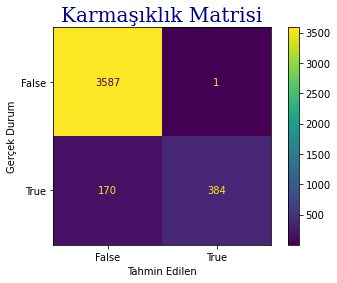

In [47]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
%matplotlib inline

karmasiklikMatrisi = np.array([[TN,FN],[FP,TP]])
kM_gorsel = metrics.ConfusionMatrixDisplay(confusion_matrix = karmasiklikMatrisi, display_labels = [False, True])

kM_gorsel.plot()
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Durum")
plt.title("Karmaşıklık Matrisi", fontdict = {'family':'serif','color':'Darkblue','size':20})

plt.show()

# ***ÇIKARIM:***

**kategoriBulGENELGE** isimli fonksiyonumuz 4142 adet kayıt içinde belge türü tahmini yapmıştır.

- 385 Genelge kategorisinde sınıflandırılan belgenin 1'i hariç hepsini Genelge kategorisinde sınıflandırabilmiştir.
- 170 Genelge kategorisinde sınıflandırılmayan belgeyi de Genelge olarak sınıflandırmıştır.
- 3587 Genelge kategorisinde sınıflandırılmayan belgeyi de Genelge kategorisinde sınıflandırmamıştır.
- Kural bazlı yöntemimiz için hesaplamalar aşağıdaki gibi olmuştur.
 - **Doğruluk (Accuracy):** 0.9587155963302753
 - **Keskinlik (Precision):** 0.6931407942238267
 - **Hassasiyet (Sensitivity) / Duyarlılık (Recall):** 0.9974025974025974
 - **Özgüllük (Specificity):** 0.9547511312217195
 - **F1-Puanı (F1 Score):** 0.8390603993494585